In [ ]:
import random
from operator import itemgetter
import numpy as np
import matplotlib.pyplot as plt
import time
time_list = []

In [ ]:
def initialise_pop(n, size):
  pop = []
  for _ in range(size):
    l = [chr(i+65) for i in range(1, n)]
    mem = ['A']
    while l != []:
      temp = random.choice(l)
      mem.append(temp)
      l.remove(temp)
    mem.append('A')
    pop.append(mem)
  return pop

In [ ]:
initialise_pop(5, 10)

[['A', 'E', 'C', 'D', 'B', 'A'],
 ['A', 'E', 'C', 'D', 'B', 'A'],
 ['A', 'E', 'C', 'B', 'D', 'A'],
 ['A', 'C', 'D', 'E', 'B', 'A'],
 ['A', 'B', 'C', 'E', 'D', 'A'],
 ['A', 'E', 'C', 'B', 'D', 'A'],
 ['A', 'B', 'C', 'D', 'E', 'A'],
 ['A', 'D', 'B', 'C', 'E', 'A'],
 ['A', 'B', 'E', 'C', 'D', 'A'],
 ['A', 'D', 'C', 'E', 'B', 'A']]

In [ ]:
def fitness(G, graph):
  ans=0
  for i in range(0,len(G)-1):
    if graph[ord(G[i])-65][ord(G[i+1])-65] != -1:
      ans+=graph[ord(G[i])-65][ord(G[i+1])-65]
    else:
      ans = -1
      break
  return 1/ans

In [ ]:
graph= [[0, 2, -1, 12, 5],
        [2, 0, 4, 8, -1],
        [-1, 4, 0, 3, 3],
        [12, 8, 3, 0, 10],
        [5, -1, 3, 10, 0]]
G = ['A', 'C', 'E', 'B', 'D', 'A']
fitness(G, graph)

-1.0

In [ ]:
G = ['A', 'B', 'C', 'E', 'D', 'A']
fitness(G, graph)

0.03225806451612903

In [ ]:
def cyclic_crossover(p1,p2):
  p1_copy = p1[1:len(p1)-1]
  p2_copy = p2[1:len(p2)-1]
  cycles=[0]*len(p1_copy)
  count=1
  while 0 in cycles:
    flag = 0
    for i, j in enumerate(cycles):
      if j == 0:
        start = i
        break
      else:
        flag += 1
    if flag == len(cycles):
      break
    c = start
    b = p2_copy[c]
    while True:
      cycles[c] = count
      c = p1_copy.index(b)
      b = p2_copy[c]
      if c == start:
        break
    count+=1
  c1_copy = ['']*len(p1_copy)
  c2_copy = ['']*len(p1_copy)
  for i,cycle in enumerate(cycles):
    if cycle%2==0:
      c1_copy[i] = p1_copy[i]
      c2_copy[i] = p2_copy[i]
    else:
      c1_copy[i] = p2_copy[i]
      c2_copy[i] = p1_copy[i]
  c1 = ['A'] + c1_copy + ['A']
  c2 = ['A'] + c2_copy + ['A']
  return [c1, c2]

In [ ]:
p1 = ['A', 'C', 'E', 'F', 'B', 'D', 'A']
p2 = ['A', 'B', 'F', 'C', 'E', 'D', 'A']
cyclic_crossover(p1, p2)

[['A', 'B', 'F', 'C', 'E', 'D', 'A'], ['A', 'C', 'E', 'F', 'B', 'D', 'A']]

In [ ]:
def ordinal_rep(p, r):
  r_copy = r.copy()
  rep = [0]*len(p)
  for i,j in enumerate(p):
    rep[i] = r_copy.index(j)
    r_copy.remove(j)
  return rep

In [ ]:
def letter_rep(c, r):
  r_copy = r.copy()
  rep = ['']*len(c)
  for i,j in enumerate(c):
    rep[i] = r_copy[j]
    del r_copy[j]
  return rep

In [ ]:
def ordinal_crossover(p1, p2):
  p1_copy = p1[1:len(p1)-1]
  p2_copy = p2[1:len(p2)-1]
  c1_copy = [0]*len(p1_copy)
  c2_copy = [0]*len(p2_copy)
  r = ['']*len(p1_copy)
  for i in range(len(p1_copy)):
    r[i] = chr(66+i)
  p1_rep = ordinal_rep(p1_copy, r)
  p2_rep = ordinal_rep(p2_copy, r)
  bp = random.randint(1,len(p1_copy)-2)
  #print("breakpoint: ",bp)
  c1_rep = p1_rep[:bp] + p2_rep[bp:]
  c2_rep = p2_rep[:bp] + p1_rep[bp:]
  c1_copy = letter_rep(c1_rep, r)
  c2_copy = letter_rep(c2_rep, r)
  c1 = ['A'] + c1_copy + ['A']
  c2 = ['A'] + c2_copy + ['A']
  return c1, c2

In [ ]:
p1 = ['A', 'C', 'D', 'E', 'B', 'F','A']
p2 = ['A', 'D', 'B', 'F','C', 'E','A']
ordinal_crossover(p1, p2)

(['A', 'C', 'B', 'F', 'D', 'E', 'A'], ['A', 'D', 'C', 'E', 'B', 'F', 'A'])

In [ ]:
def roulette_wheel(gen, fitness, graph):
  fit = [0.000000000000000001 if x==-1 else x for x in fitness]
  return random.choices(gen, weights=fit, k=len(gen))

In [ ]:
gen = [['A', 'C', 'E', 'F', 'B', 'D', 'A'],['A', 'B', 'F', 'C', 'E', 'D', 'A'],['A', 'D', 'C', 'E', 'B', 'F', 'A']]
fit = [0.43, -1, 0.5]
roulette_wheel(gen, fit, graph)

[['A', 'D', 'C', 'E', 'B', 'F', 'A'],
 ['A', 'C', 'E', 'F', 'B', 'D', 'A'],
 ['A', 'D', 'C', 'E', 'B', 'F', 'A']]

In [ ]:
def mutation(offspring):
  for i, child in enumerate(offspring):
    v1 = random.randint(1,len(child)-2)
    v2 = random.randint(1,len(child)-2)
    #print(v1, ' ', v2)
    if v1!=v2:
      temp = child[v1]
      child[v1] = child[v2]
      child[v2] = temp
    offspring[i] = child
  return offspring

In [ ]:
offspring = [['A', 'C', 'E', 'F', 'B', 'D', 'A'], ['A', 'C', 'E', 'F', 'B', 'D', 'A']]
mutation(offspring)

[['A', 'C', 'E', 'D', 'B', 'F', 'A'], ['A', 'B', 'E', 'F', 'C', 'D', 'A']]

In [ ]:
def replace(k, gen, fit, graph, offspring):
  off_fitness = [fitness(G, graph) for G in offspring]
  #print(off_fitness)
  gen_sorted = [i for _,i in sorted(zip(fit,gen), reverse=True)]
  offspring_sorted = [i for _,i in sorted(zip(off_fitness,offspring), reverse=True)]
  return gen_sorted[:len(gen)-k]+offspring_sorted[:k]

In [ ]:
gen = [['A', 'C', 'E', 'B', 'D', 'A'],
 ['A', 'D', 'C', 'E', 'B', 'A'],
 ['A', 'B', 'C', 'E', 'D', 'A'],
 ['A', 'D', 'C', 'B', 'E', 'A'],
 ['A', 'B', 'D', 'C', 'E', 'A']]
fit = [fitness(G, graph) for G in gen]
print(fit)
offspring = [['A', 'E', 'C', 'D', 'B', 'A'],
 ['A', 'D', 'B', 'E', 'C', 'A'],
 ['A', 'D', 'C', 'E', 'B', 'A'],
 ['A', 'C', 'E', 'D', 'B', 'A'],
 ['A', 'B', 'C', 'E', 'D', 'A']]
replace(3, gen, fit, graph, offspring)

[-1.0, -1.0, 0.03225806451612903, -1.0, 0.047619047619047616]


[['A', 'B', 'D', 'C', 'E', 'A'],
 ['A', 'B', 'C', 'E', 'D', 'A'],
 ['A', 'E', 'C', 'D', 'B', 'A'],
 ['A', 'B', 'C', 'E', 'D', 'A'],
 ['A', 'D', 'C', 'E', 'B', 'A']]

In [ ]:
def TSP(graph, pop_size=10, k = 5, crossover='cyclic', max_itr = 10):
  count = 0
  gen = [None] * (max_itr+1)
  gen[count] = initialise_pop(len(graph), pop_size)
  fitness_list = [fitness(G, graph) for G in gen[count]]
  print('Gen ',count)
  for i in [(g, f) for g, f in zip(gen[count], fitness_list)]:
    print(i)
  print()
  while True:
    selected = roulette_wheel(gen[count], fitness_list, graph)
    half1 = selected[:int(len(selected)/2)]
    half2 = selected[int(len(selected)/2):]
    offspring = []
    for p1, p2 in zip(half1, half2):
      if crossover == 'cyclic':
        offspring += cyclic_crossover(p1,p2)
      elif crossover == 'ordinal':
        offspring += ordinal_crossover(p1,p2)
    if random.choices([1, 0], weights=[0.2, 0.8], k=1) == [1]:
      print('mutation occured!')
      offspring = mutation(offspring)
    count += 1
    gen[count] = replace(k, gen[count-1], fitness_list, graph, offspring)
    prev_fitness = sum(fitness_list)/len(fitness_list)
    fitness_list = [fitness(G, graph) for G in gen[count]]
    print('Gen ',count)
    for i in [(g, f) for g, f in zip(gen[count], fitness_list)]:
      print(i)
    print()
    if sum(fitness_list)/len(fitness_list) == prev_fitness and prev_fitness!=-1:
      break
    if max_itr == count:
      break
  return gen[count][fitness_list.index(max(fitness_list))]

In [ ]:
X = np.random.randint(-1, 15, size=(5,5))
for i in range(len(X)):
  for j in range(len(X)):
    if i!=j:
      if X[i][j]==0:
        X[i][j] = -1
X[np.diag_indices_from(X)] = 0
print(X)

[[ 0 13  1  1  7]
 [ 9  0  5  5 -1]
 [11  8  0  7 10]
 [ 6 -1  9  0 10]
 [-1  7  8  6  0]]


In [ ]:
start_time = time.time()
print('path: ',TSP(X))
time_list.append(time.time() - start_time)

Gen  0
(['A', 'E', 'C', 'D', 'B', 'A'], -1.0)
(['A', 'E', 'C', 'D', 'B', 'A'], -1.0)
(['A', 'C', 'E', 'D', 'B', 'A'], -1.0)
(['A', 'D', 'B', 'C', 'E', 'A'], -1.0)
(['A', 'C', 'E', 'D', 'B', 'A'], -1.0)
(['A', 'B', 'E', 'C', 'D', 'A'], -1.0)
(['A', 'E', 'C', 'B', 'D', 'A'], 0.029411764705882353)
(['A', 'E', 'D', 'B', 'C', 'A'], -1.0)
(['A', 'C', 'E', 'B', 'D', 'A'], 0.034482758620689655)
(['A', 'D', 'C', 'B', 'E', 'A'], -1.0)

Gen  1
(['A', 'C', 'E', 'B', 'D', 'A'], 0.034482758620689655)
(['A', 'E', 'C', 'B', 'D', 'A'], 0.029411764705882353)
(['A', 'E', 'D', 'B', 'C', 'A'], -1.0)
(['A', 'E', 'C', 'D', 'B', 'A'], -1.0)
(['A', 'E', 'C', 'D', 'B', 'A'], -1.0)
(['A', 'C', 'E', 'B', 'D', 'A'], 0.034482758620689655)
(['A', 'C', 'E', 'B', 'D', 'A'], 0.034482758620689655)
(['A', 'C', 'E', 'B', 'D', 'A'], 0.034482758620689655)
(['A', 'C', 'E', 'B', 'D', 'A'], 0.034482758620689655)
(['A', 'E', 'C', 'B', 'D', 'A'], 0.029411764705882353)

Gen  2
(['A', 'C', 'E', 'B', 'D', 'A'], 0.034482758620689655

In [ ]:
X = np.random.randint(-1, 15, size=(10,10))
for i in range(len(X)):
  for j in range(len(X)):
    if i!=j:
      if X[i][j]==0:
        X[i][j] = -1
X[np.diag_indices_from(X)] = 0
print(X)

[[ 0 12  7  3  2  9  5  4  4 14]
 [ 2  0  1 -1  2 -1  5 13  4  9]
 [10  3  0 10 13  2  3  9 12  3]
 [ 2 -1  3  0  8  8  1 14  9 13]
 [ 4 14 14 12  0 14  4  4  6 -1]
 [-1  6 11 11  8  0  2 13  2  8]
 [ 1 14  9  8 12  5  0  6  9  8]
 [ 1  2 10 10 13  4 11  0  6  4]
 [ 7  9  1 -1  8 14 -1 -1  0  4]
 [ 7  3  3  8 11  5  8 13  7  0]]


In [ ]:
start_time = time.time()
print('path: ',TSP(X))
time_list.append(time.time() - start_time)

Gen  0
(['A', 'D', 'I', 'G', 'B', 'H', 'J', 'F', 'C', 'E', 'A'], -1.0)
(['A', 'H', 'E', 'J', 'D', 'C', 'B', 'G', 'I', 'F', 'A'], -1.0)
(['A', 'H', 'I', 'D', 'J', 'F', 'C', 'B', 'G', 'E', 'A'], -1.0)
(['A', 'E', 'H', 'D', 'G', 'C', 'F', 'B', 'J', 'I', 'A'], 0.017543859649122806)
(['A', 'D', 'F', 'G', 'B', 'C', 'J', 'E', 'H', 'I', 'A'], 0.01694915254237288)
(['A', 'E', 'D', 'F', 'J', 'I', 'C', 'G', 'H', 'B', 'A'], 0.0196078431372549)
(['A', 'D', 'J', 'E', 'I', 'H', 'G', 'C', 'F', 'B', 'A'], -1.0)
(['A', 'H', 'B', 'D', 'C', 'G', 'J', 'E', 'F', 'I', 'A'], -1.0)
(['A', 'H', 'F', 'I', 'J', 'G', 'C', 'D', 'E', 'B', 'A'], 0.015384615384615385)
(['A', 'I', 'G', 'B', 'E', 'J', 'H', 'F', 'D', 'C', 'A'], -1.0)

Gen  1
(['A', 'E', 'D', 'F', 'J', 'I', 'C', 'G', 'H', 'B', 'A'], 0.0196078431372549)
(['A', 'E', 'H', 'D', 'G', 'C', 'F', 'B', 'J', 'I', 'A'], 0.017543859649122806)
(['A', 'D', 'F', 'G', 'B', 'C', 'J', 'E', 'H', 'I', 'A'], 0.01694915254237288)
(['A', 'H', 'F', 'I', 'J', 'G', 'C', 'D', 'E', 

In [ ]:
print('path: ',TSP(X, crossover = 'ordinal'))

Gen  0
(['A', 'G', 'E', 'H', 'B', 'D', 'I', 'F', 'J', 'C', 'A'], -1.0)
(['A', 'E', 'F', 'C', 'B', 'J', 'H', 'G', 'I', 'D', 'A'], -1.0)
(['A', 'J', 'F', 'B', 'E', 'G', 'H', 'C', 'I', 'D', 'A'], -1.0)
(['A', 'J', 'F', 'I', 'E', 'D', 'H', 'C', 'B', 'G', 'A'], 0.013513513513513514)
(['A', 'F', 'G', 'C', 'D', 'J', 'E', 'B', 'H', 'I', 'A'], 0.010638297872340425)
(['A', 'I', 'G', 'J', 'E', 'H', 'F', 'B', 'C', 'D', 'A'], -1.0)
(['A', 'E', 'I', 'J', 'F', 'D', 'C', 'H', 'G', 'B', 'A'], 0.014925373134328358)
(['A', 'D', 'B', 'H', 'F', 'C', 'J', 'G', 'E', 'I', 'A'], -1.0)
(['A', 'I', 'D', 'B', 'E', 'G', 'J', 'C', 'F', 'H', 'A'], -1.0)
(['A', 'F', 'E', 'G', 'J', 'H', 'C', 'B', 'D', 'I', 'A'], -1.0)

Gen  1
(['A', 'E', 'I', 'J', 'F', 'D', 'C', 'H', 'G', 'B', 'A'], 0.014925373134328358)
(['A', 'J', 'F', 'I', 'E', 'D', 'H', 'C', 'B', 'G', 'A'], 0.013513513513513514)
(['A', 'F', 'G', 'C', 'D', 'J', 'E', 'B', 'H', 'I', 'A'], 0.010638297872340425)
(['A', 'J', 'F', 'B', 'E', 'G', 'H', 'C', 'I', 'D', 'A'],

In [ ]:
X = np.random.randint(-1, 15, size=(20,20))
for i in range(len(X)):
  for j in range(len(X)):
    if i!=j:
      if X[i][j]==0:
        X[i][j] = -1
X[np.diag_indices_from(X)] = 0
print(X)

[[ 0  2  5 11 13  2  5  1  3  7  7 14  3  7 -1 -1  8  5 11 -1]
 [ 5  0 10 12 13  2  1 14  1 14 -1  5 12 10  2 10  9 13 14  3]
 [-1  4  0 10 14 -1  3  6  5  1  1 12 14  2 -1  3  1  2  4 14]
 [ 3  7  6  0  6  3  9  2  1  7 14 -1  5 10 12  3 12 10  4  5]
 [ 6  8  9  6  0 12  3  1 10  2  5  5  8 10  7  8  9 -1  7  3]
 [12 -1  5 -1 12  0 14  2 11 12  7  2  3  5 14  8  7  1  8 -1]
 [14 -1  3 12  9 13  0  3  9  6 11  3  7 13  9  1  2 12 11  4]
 [ 7 11  3  9 12 10  3  0 -1 13 12 14 10  3  2 11  5 -1 12  4]
 [11 13 11 10  4 -1 -1  7  0 -1 12  7  3 10 13  4 14  1 -1  3]
 [ 6  9 -1 14 -1 -1 13 13 11  0  9  8 -1  3  8 14 14  2 -1  6]
 [ 3  6  3 10 -1 14  8  9  7  1  0  8 -1 11 -1 11 10  2 14  6]
 [ 3 11 10  5 11 -1 -1 13  5 11 12  0  3 -1  8  5  2  3 12 14]
 [10 -1  1  9  9 10 13  1  6  5 14  3  0 12 11  7 10 11  2 11]
 [11 13  1  8 13  8 -1 11 -1  8 -1  3  4  0  2 14 -1 13  5 13]
 [-1 -1  9 -1  5  1  2 13  9  6  8  9 12 13  0  2  8 11 -1  2]
 [ 2  9 14  3 -1  2  8 -1 14 -1  9 12  1  9  5  0  2  4

In [ ]:
start_time = time.time()
print('path: ',TSP(X, max_itr=20))
time_list.append(time.time() - start_time)

Gen  0
(['A', 'M', 'S', 'L', 'P', 'D', 'N', 'H', 'C', 'J', 'G', 'F', 'Q', 'E', 'T', 'R', 'I', 'B', 'O', 'K', 'A'], -1.0)
(['A', 'B', 'N', 'G', 'O', 'R', 'E', 'C', 'I', 'S', 'P', 'K', 'L', 'D', 'H', 'M', 'Q', 'T', 'F', 'J', 'A'], -1.0)
(['A', 'Q', 'C', 'F', 'J', 'T', 'R', 'S', 'M', 'B', 'N', 'G', 'I', 'E', 'K', 'H', 'O', 'L', 'P', 'D', 'A'], -1.0)
(['A', 'B', 'N', 'C', 'M', 'P', 'G', 'L', 'K', 'R', 'F', 'E', 'D', 'J', 'I', 'T', 'H', 'O', 'Q', 'S', 'A'], -1.0)
(['A', 'Q', 'H', 'L', 'O', 'J', 'G', 'K', 'B', 'N', 'R', 'I', 'S', 'C', 'M', 'E', 'D', 'T', 'P', 'F', 'A'], -1.0)
(['A', 'J', 'I', 'F', 'P', 'G', 'M', 'T', 'K', 'R', 'C', 'E', 'H', 'N', 'B', 'O', 'L', 'S', 'Q', 'D', 'A'], -1.0)
(['A', 'J', 'L', 'B', 'G', 'N', 'D', 'O', 'T', 'Q', 'S', 'K', 'C', 'H', 'I', 'F', 'R', 'M', 'P', 'E', 'A'], -1.0)
(['A', 'E', 'S', 'R', 'I', 'T', 'J', 'L', 'F', 'Q', 'O', 'C', 'G', 'H', 'D', 'B', 'P', 'N', 'K', 'M', 'A'], -1.0)
(['A', 'M', 'H', 'P', 'K', 'N', 'F', 'B', 'S', 'C', 'O', 'J', 'G', 'T', 'Q', 'E',

In [ ]:
X = np.random.randint(-1, 15, size=(40,40))
for i in range(len(X)):
  for j in range(len(X)):
    if i!=j:
      if X[i][j]==0:
        X[i][j] = -1
X[np.diag_indices_from(X)] = 0
print(X)

[[ 0  9  6 ... -1 10 14]
 [ 1  0  3 ...  9  4  8]
 [ 4  1  0 ... 11 -1  3]
 ...
 [10  4 14 ...  0  1 14]
 [ 1  6 -1 ... 11  0  3]
 [ 5  5 10 ...  6  8  0]]


In [ ]:
start_time = time.time()
print('path: ',TSP(X, max_itr=50))
time_list.append(time.time() - start_time)

Gen  0
(['A', 'H', 'Z', 'I', '`', 'L', 'P', 'D', 'B', '[', 'X', ']', '\\', 'W', 'M', 'a', 'K', 'f', 'U', 'S', 'c', 'V', 'g', 'Y', 'G', 'J', '^', 'T', 'b', 'F', 'C', 'N', 'd', 'E', 'O', '_', 'R', 'e', 'h', 'Q', 'A'], -1.0)
(['A', 'V', 'f', 'Z', 'S', 'X', 'R', 'C', 'D', 'U', 'Y', '_', 'Q', '`', 'G', 'd', 'B', 'M', 'T', '[', 'H', 'F', '^', 'h', 'e', 'N', 'J', 'K', '\\', 'b', 'I', 'g', 'O', 'P', 'c', 'a', 'L', ']', 'E', 'W', 'A'], -1.0)
(['A', 'E', 'V', 'Y', 'Z', 'J', '^', 'g', 'K', 'e', 'h', 'N', 'P', ']', 'c', 'U', 'T', 'S', 'a', 'F', 'H', 'L', 'b', 'M', '\\', '_', 'O', 'D', 'G', 'I', 'f', 'd', '`', 'W', '[', 'B', 'C', 'X', 'R', 'Q', 'A'], -1.0)
(['A', 'X', 'U', ']', 'g', 'd', 'h', 'K', '`', '\\', '^', 'G', 'B', 'H', 'R', 'N', 'a', 'F', 'P', 'Y', 'Z', 'f', 'J', '_', '[', 'V', 'S', 'Q', 'e', 'O', 'M', 'C', 'c', 'T', 'I', 'W', 'L', 'D', 'b', 'E', 'A'], -1.0)
(['A', 'S', 'd', 'b', 'T', 'K', 'N', 'Q', 'C', 'E', 'D', 'J', 'W', ']', '\\', 'X', 'e', 'L', 'R', 'P', 'G', 'h', 'Z', 'I', 'f', 'B', 

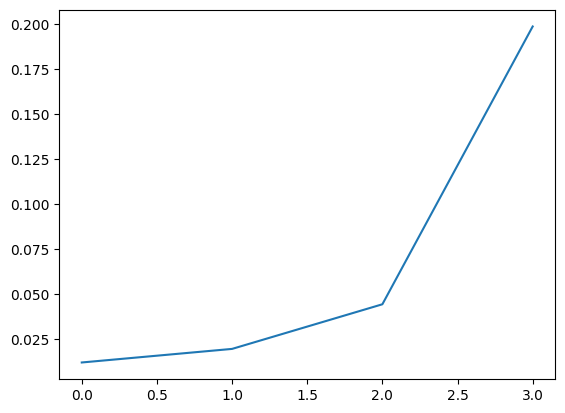

In [ ]:
plt.plot(time_list)